# Import libraries and customer_ords_prods_merge dataframe 

In [2]:
# Import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

In [3]:
# Path Variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\Instacart Basket Analysis'
# Import customer_ords_prods_merge dataframe 
IC_customer_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merge.pkl'))

In [4]:
# Ensure dataframe imported as expected
IC_customer_ords_prods.shape

(32404859, 33)

In [5]:
# Make sure columns look as expected 
IC_customer_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
# Include all columns in dataframe
pd.options.display.max_columns = None

In [8]:
# View columns
IC_customer_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spent_flag,customer_frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


The personally identifiable information (PII) include people's first and last name. In order to address this, remove the first and last name columns

In [10]:
# Remove first name column
IC_customer_ords_prods = IC_customer_ords_prods.drop(columns = ['first_name', 'surname'])

### Create a regional segmentation of the data 

In [12]:
# Create a list for northeast region 
northeast = ['Maine',
'New Hampshire',
'Vermont',
'Massachusetts',
'Rhode Island',
'Connecticut',
'New York',
'Pennsylvania',
'New Jersey']

In [13]:
# Create a list for the midwest region 
midwest = ['Wisconsin',
'Michigan',
'Illinois',
'Indiana',
'Ohio',
'North Dakota',
'South Dakota',
'Nebraska',
'Kansas',
'Minnesota',
'Iowa',
'Missouri']

In [14]:
# Create a list for the south region 
south = ['Delaware',
'Maryland',
'District of Columbia',
'Virginia',
'West Virginia',
'North Carolina',
'South Carolina',
'Georgia',
'Florida',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Oklahoma',
'Texas',
'Arkansas',
'Louisiana']

In [15]:
# Create a list for the west region 
west = ['Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Alaska',
'Washington',
'Oregon',
'California',
'Hawaii']

In [16]:
# if statement with loc() to create northeast region column 
IC_customer_ords_prods.loc[IC_customer_ords_prods['state'].isin(northeast), 'region'] = 'northeast'

In [17]:
# if statement with loc() to create midwest region 
IC_customer_ords_prods.loc[IC_customer_ords_prods['state'].isin(midwest), 'region'] = 'midwest'

In [18]:
# If statement with loc() to create south region 
IC_customer_ords_prods.loc[IC_customer_ords_prods['state'].isin(south), 'region'] = 'south'

In [19]:
# If statement with loc() to create west region
IC_customer_ords_prods.loc[IC_customer_ords_prods['state'].isin(west), 'region'] = 'west'

In [20]:
# Check frequency count of new derived column
IC_customer_ords_prods['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [21]:
# Create a region_spending_crosstab to view spending habits among the regions 
region_spending_crosstab = pd.crosstab(IC_customer_ords_prods['region'], IC_customer_ords_prods['spent_flag'], dropna = False)

In [22]:
region_spending_crosstab

spent_flag,High spender,Low spender
region,,
midwest,155975,7441350
northeast,108225,5614511
south,209691,10582194
west,160354,8132559


The south region contains the highest amount of high spenders and low spenders. On the other hand, the northeast region had the lowest amount of high spenders and low spenders.

### Create an exclusion flag for low activity customers containing < 5 orders

In [25]:
# If statement with loc() function to identify columns to keep
IC_customer_ords_prods.loc[IC_customer_ords_prods['max_order'] >= 5, 'exclusion_flag'] = 'keep'

In [26]:
# If statement with loc() function to identify columns to exclude 
IC_customer_ords_prods.loc[IC_customer_ords_prods['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [27]:
# Check frequency count 
IC_customer_ords_prods['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
keep       30964564
exclude     1440295
Name: count, dtype: int64

In [28]:
# checking output
IC_customer_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spent_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,keep
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,keep
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,keep
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,keep
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,keep


In [29]:
# exclude customer orders <5 from dataframe 
IC_subset = IC_customer_ords_prods[IC_customer_ords_prods['exclusion_flag'] == 'keep']

In [30]:
# check shape of dataframe
IC_subset.shape

(30964564, 33)

In [67]:
# export IC_subset 
IC_subset.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'IC_customer_ords_prods_subset.pkl'))

### Create a profiling variable 

#### Create an age variable

In [70]:
# Create an age_group variable where 25 and under is considered young adult 
IC_subset.loc[IC_subset['age']<=25, 'age_group']= 'Young Adult'

# Create an age_group variable where 26-44
IC_subset.loc[(IC_subset['age']>25)&(IC_subset['age']<45), 'age_group']='Adult'

# Create an age_group variable where 45-64 is considered an older adult
IC_subset.loc[(IC_subset['age']>=45)&(IC_subset['age']<65), 'age_group']='Older Adult'

# Create an age_group vairabel where 65+ is considered a senior
IC_subset.loc[IC_subset['age']>=65, 'age_group']='Senior'

In [71]:
# Verify output 
IC_subset['age_group'].value_counts(dropna = False)

age_group
Older Adult    9690051
Adult          9214451
Senior         8195544
Young Adult    3864518
Name: count, dtype: int64

#### Create a variable based on income

In [73]:
# create an income_class variable where lower class is < $58,000
IC_subset.loc[IC_subset['income'] < 58000, 'income_class'] = 'Lower'

# Create an income_class variable where middle class is $58,000-$153,000
IC_subset.loc[(IC_subset['income'] >= 58000) & (IC_subset['income'] < 153000),'income_class']= 'Middle'

# Create an income_class variable where upper class is $153,000
IC_subset.loc[IC_subset['income'] >= 153000, 'income_class'] = 'Upper'

In [74]:
# frequency check of income_class variable
IC_subset['income_class'].value_counts(dropna = False)

income_class
Middle    22323591
Lower      5279576
Upper      3361397
Name: count, dtype: int64

#### Create a variable for the number of dependants

In [76]:
# Create a family_size variable 
IC_subset.loc[IC_subset['number_of_dependants'] <1, 'family_size'] = 'single'
IC_subset.loc[(IC_subset['number_of_dependants'] >=1) & (IC_subset['number_of_dependants'] <=2), 'family_size'] = 'small'
IC_subset.loc[IC_subset['number_of_dependants'] >= 3, 'family_size'] = 'large'

In [77]:
IC_subset['family_size'].value_counts(dropna = False)

family_size
small     15452367
large      7772516
single     7739681
Name: count, dtype: int64

### Create visualizations to show distribution of profiles

Text(0.5, 1.0, 'Number of Orders Per Age Group')

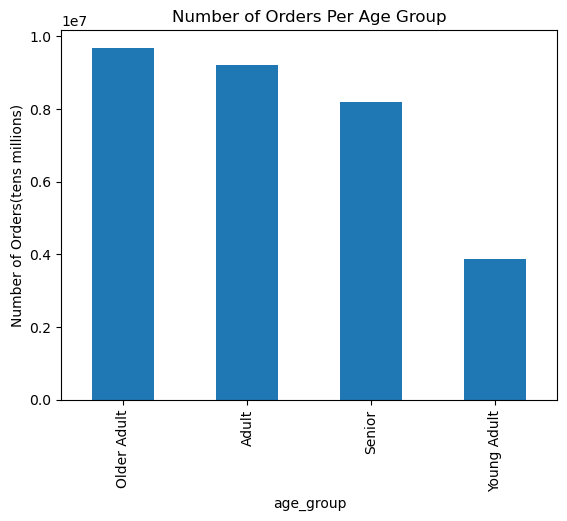

In [79]:
# Create a bar chart based on age_group and number of orders placed
age_bar = IC_subset['age_group'].value_counts().plot.bar()
plt.ylabel('Number of Orders(tens millions)')
plt.title('Number of Orders Per Age Group')

In [80]:
#Export age_group bar chart 
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'), bbox_inches='tight')

#### Observations
#### Older adults, which are those 45-64, have the highest number of orders closely followed by adults, those 26-44.
#### Based on this insight, Instacart can target these age groups to boost sales of products.

Text(0.5, 1.0, 'Number of Orders Based on Income Class')

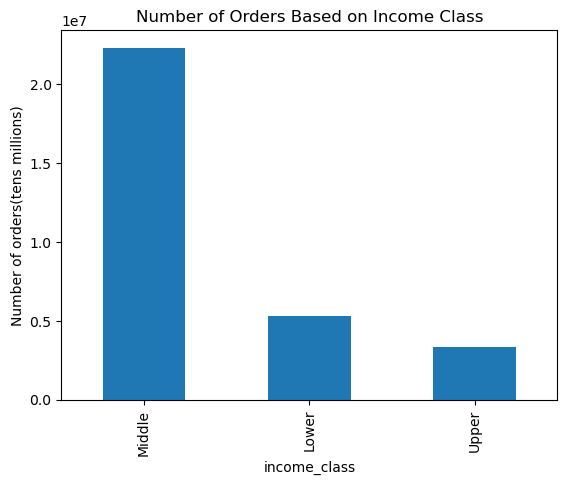

In [82]:
# Create a bar chart comparing the number of orders to income classes 
income_bar = IC_subset['income_class'].value_counts().plot.bar()
plt.ylabel('Number of orders(tens millions)')
plt.title('Number of Orders Based on Income Class')

In [83]:
# Export income_bar 
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_class_vs_#_of_orders.png'))

#### Observation 
#### The middle class contains the most orders followed by lower-class. In terms of marketing strategies, targeting the middle class will be most beneficial 

Text(0.5, 1.0, 'High / Low Spenders Per Region')

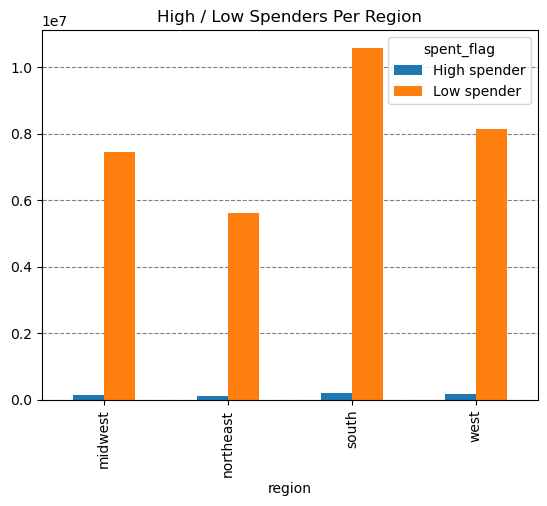

In [85]:
# create a bar chart comapring high spenders vs low spenders among the regions 
region_spend_bar = region_spending_crosstab.plot.bar()
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('High / Low Spenders Per Region')

In [86]:
# export region_spend_bar
region_spend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'high_spender_vs_low_spender_bar.png'))

Text(0.5, 1.0, 'Number of Orders Compared to Family Size')

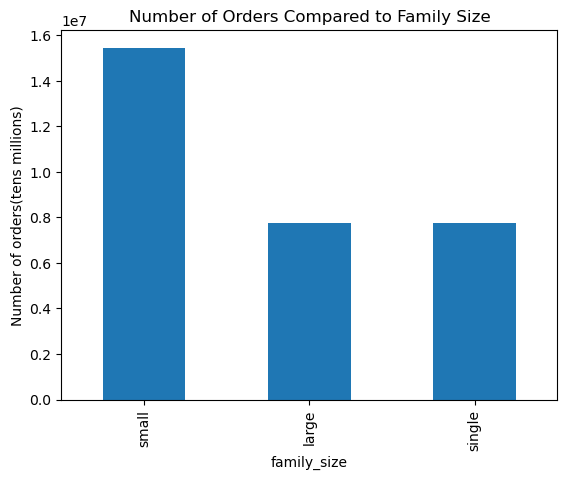

In [87]:
# create a bar chart of the number of dependants vs order
dep_bar = IC_subset['family_size'].value_counts().plot.bar()
plt.gca().set_axisbelow(True) 
plt.ylabel('Number of orders(tens millions)')
plt.title('Number of Orders Compared to Family Size')

In [88]:
# export barchart 
dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_number_of_orders_vs_family_size.png'))

#### Observation 
#### small families have the highest amount of orders.

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [91]:
# create a groupby function to gather total price of orders
IC_subset_group = IC_subset.groupby(['user_id', 'age_group', 'income_class','family_size', 'loyalty_flag',
'region', 'order_number', 'days_since_prior_order', 'order_hour_of_day', 'orders_day_of_week'])['prices'].sum().reset_index()

In [92]:
# Rename the prices column to total_price
IC_subset_group.rename(columns = {'prices' : 'total_price'}, inplace = True)

In [93]:
# check output
IC_subset_group.head(20)

,user_id,age_group,income_class,family_size,loyalty_flag,region,order_number,days_since_prior_order,order_hour_of_day,orders_day_of_week,total_price
0,1,Adult,Lower,large,New customer,south,2,15.0,7,3,35.4
1,1,Adult,Lower,large,New customer,south,3,21.0,12,3,28.2
2,1,Adult,Lower,large,New customer,south,4,29.0,7,4,26.0
3,1,Adult,Lower,large,New customer,south,5,28.0,15,4,57.0
4,1,Adult,Lower,large,New customer,south,6,19.0,7,2,25.0
5,1,Adult,Lower,large,New customer,south,7,20.0,9,1,29.0
6,1,Adult,Lower,large,New customer,south,8,14.0,14,1,40.2
7,1,Adult,Lower,large,New customer,south,9,0.0,16,1,40.2
8,1,Adult,Lower,large,New customer,south,10,30.0,8,4,63.1
9,10,Adult,Lower,small,New customer,south,2,30.0,15,5,429.6


In [94]:
# Age group customer profile 
IC_subset_group.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'total_price' : ['min', 'mean', 'max']})

days_since_prior_order                  total_price              \
                               min       mean   max         min        mean   
age_group                                                                     
Adult                          0.0  10.403753  30.0         1.0  119.309617   
Older Adult                    0.0  10.382166  30.0         1.0  122.515094   
Senior                         0.0  10.372165  30.0         1.0  117.902487   
Young Adult                    0.0  10.380577  30.0         1.0  123.717587   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

In [95]:
# income class customer profile 
IC_subset_group.groupby('income_class').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'total_price' : ['min', 'mean', 'max']})

days_since_prior_order                  total_price              \
                                min       mean   max         min        mean   
income_class                                                                   
Lower                           0.0  10.900440  30.0         1.0   59.210756   
Middle                          0.0  10.272192  30.0         1.0  102.200922   
Upper                           0.0  10.132132  30.0         1.0  363.199644   

                        
                   max  
income_class            
Lower            875.0  
Middle        100384.5  
Upper         100452.9

In [96]:
# family size customer profile
IC_subset_group.groupby('family_size').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'total_price' : ['min', 'mean', 'max']})

days_since_prior_order                  total_price              \
                               min       mean   max         min        mean   
family_size                                                                   
large                          0.0  10.358521  30.0         1.0  118.324255   
single                         0.0  10.378169  30.0         1.0  121.866791   
small                          0.0  10.403203  30.0         1.0  120.886785   

                       
                  max  
family_size            
large        100330.2  
single       100384.5  
small        100452.9

### Compare customer profiles with regions and departments. Can you identify a link between them?

In [98]:
# Import department data 
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_dep_t_new.csv'))

In [99]:
# rename unnamed 0 column
df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [100]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [101]:
# Create a data dictionary
data_dict=dict(zip(df_dep['department_id'], df_dep['department']))
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

Text(0.5, 0, 'Region')

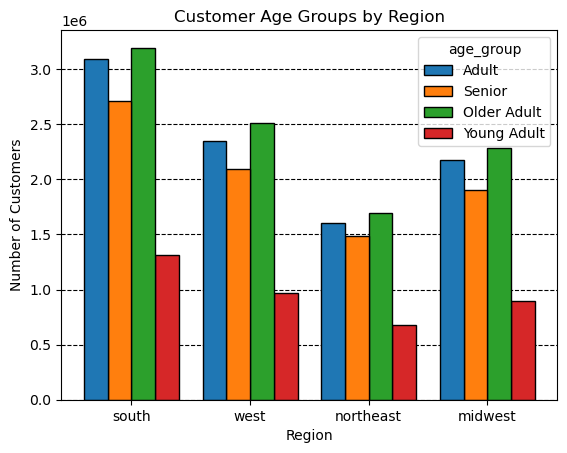

In [102]:
# create a histogram of age_group compared to region
age_group_region = sns.histplot(data= IC_subset, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='black', linestyle='dashed')
plt.title('Customer Age Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')

In [103]:
# Export histogram 
age_group_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_by_region.png'))

In [104]:
# Combine the department names to the department_id in the dataframe
IC_subset ['department'] = IC_subset['department_id'].map(data_dict)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_2708\1574748243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IC_subset ['department'] = IC_subset['department_id'].map(data_dict)


Text(0.5, 0, 'Region')

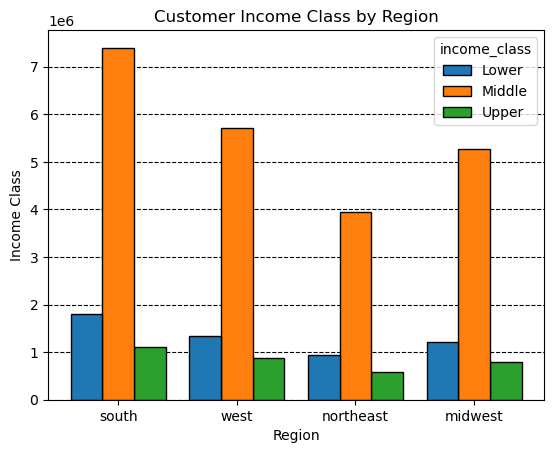

In [105]:
# Create a histrogram of income_class compared to region 
income_vs_region = sns.histplot(data= IC_subset, x='region', hue='income_class', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='black', linestyle='dashed')
plt.title('Customer Income Class by Region')
plt.ylabel('Income Class')
plt.xlabel('Region')

In [106]:
#export histogram
income_vs_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_class_vs_region.png'))

Text(0.5, 0, 'Region')

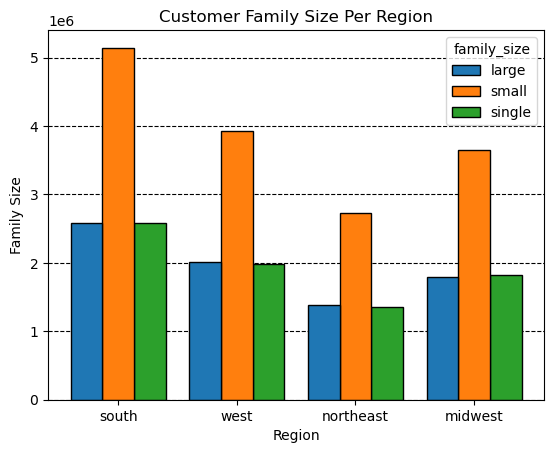

In [107]:
# Create a histrogram comparing the family_size to region 
family_size_region = sns.histplot(data= IC_subset, x='region', hue='family_size', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='black', linestyle='dashed')
plt.title('Customer Family Size Per Region')
plt.ylabel('Family Size')
plt.xlabel('Region')

In [108]:
# Export histogram
family_size_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_size_per_region.png'))

In [109]:
# Create crosstab of 'age_group' data with 'department'
crosstab_age_department=pd.crosstab(IC_subset['department'],IC_subset['age_group'], dropna = False)

In [110]:
crosstab_age_department.head(80)

age_group,Adult,Older Adult,Senior,Young Adult
department,,,,
alcohol,42167,46579,36693,19188
babies,123044,129910,106204,51234
bakery,334154,350804,295997,139873
beverages,754851,814687,684020,318343
breakfast,198803,211274,175296,85477
bulk,9902,10298,8945,4306
canned goods,302479,315774,267509,126312
dairy eggs,1549127,1612490,1368072,647493
deli,299970,314110,265199,124555


Text(0.5, 0, 'Department')

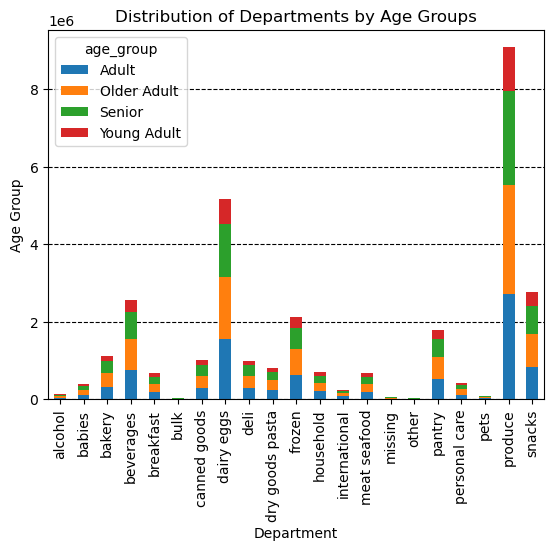

In [111]:
# Create a bar chart comparing age_group to department
departments_age_group = crosstab_age_department.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='black', linestyle='dashed')
plt.title('Distribution of Departments by Age Groups')
plt.ylabel('Age Group')
plt.xlabel('Department')

In [112]:
# export stacked bar chart
departments_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_of_departments_by_age_group.png'),bbox_inches='tight')

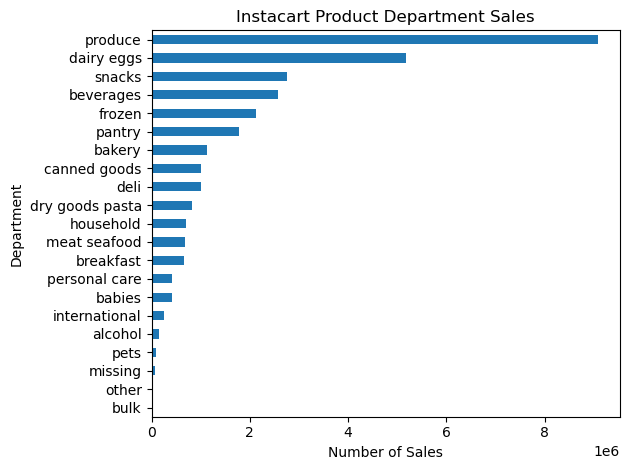

In [113]:
#create a bar chart showing product department sales 
dept_bar=IC_subset['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Instacart Product Department Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.tight_layout()

In [114]:
# Export department sales bar chart
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_department_sales.png'))

In [115]:
# create a cross tab to prepare for next visualization
crosstab_loyalty_dow = pd.crosstab(index=IC_subset['orders_day_of_week'],
                             columns=IC_subset['loyalty_flag'])

In [116]:
# Verify output
crosstab_loyalty_dow.head()

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021


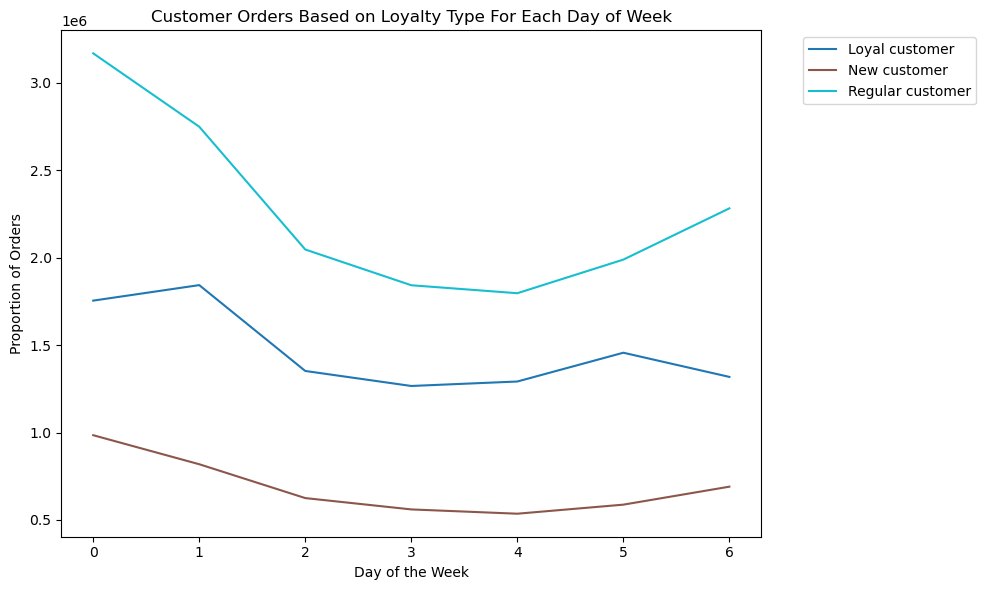

In [117]:
line_loyalty_vs_dow = crosstab_loyalty_dow.plot(kind='line', 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Customer Orders Based on Loyalty Type For Each Day of Week')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Orders")
plt.tight_layout()
plt.show()

In [118]:
# Export line_loyalty_vs_dow
line_loyalty_vs_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_vs_dow_orders.png'))

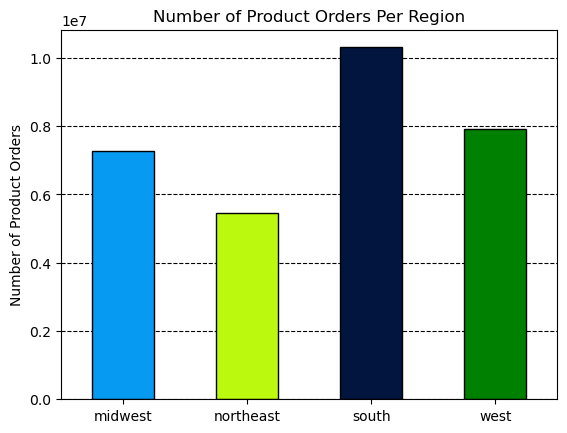

In [119]:
# create an orders_habit_region barchart 
order_habits_region = IC_subset['region'].value_counts().sort_index().plot.bar(color = ['#069AF3', '#BBF90F', '#01153E', '#008000'], edgecolor = 'black',zorder=2, alpha = 1)
plt.title("Number of Product Orders Per Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Number of Product Orders")
plt.grid(axis = 'y', color = 'black', linestyle = 'dashed')

In [120]:
# export chart
order_habits_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_order_habits_region.png'))

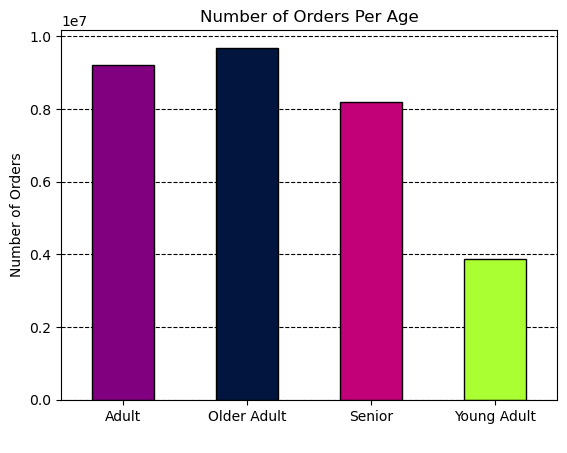

In [121]:
# Create a chart containing age and order habits 
order_habits_age_group = IC_subset['age_group'].value_counts().sort_index().plot.bar(color = ['#800080', '#01153E', '#C20078', '#AAFF32'], edgecolor = 'black',zorder=2, alpha = 1)
plt.title("Number of Orders Per Age")
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")
plt.grid(axis = 'y', color = 'black', linestyle = 'dashed')

In [122]:
# Export Chart 
order_habits_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_order_habits_age_group.png'))

In [123]:
# Create a subset wtih each age group for next visualization
IC_subset_adult = IC_subset[IC_subset['age_group'] == 'Adult']

In [124]:
IC_subset_older_adult = IC_subset[IC_subset['age_group'] == 'Older Adult']

In [125]:
IC_subset_senior = IC_subset[IC_subset['age_group'] == 'Senior']

In [126]:
IC_subset_young_adult = IC_subset[IC_subset['age_group'] == 'Young Adult']

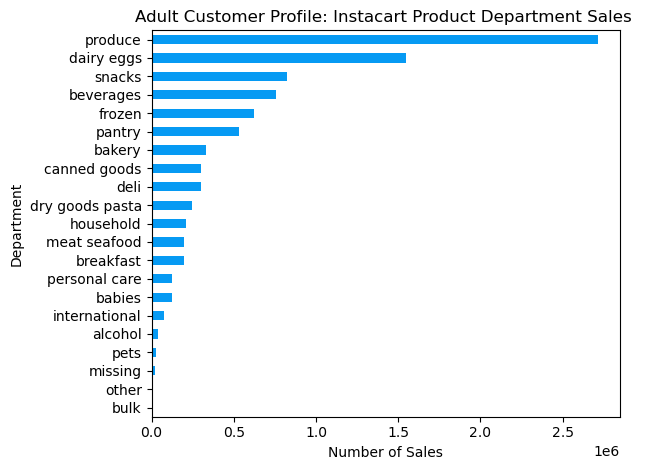

In [127]:
# create a bar chart containing what products adults are buying 
dept_adult_bar=IC_subset_adult['department'].value_counts().sort_values(ascending=True).plot.barh(color = '#069AF3')
plt.title('Adult Customer Profile: Instacart Product Department Sales ')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.tight_layout()

In [128]:
# Export chart 
dept_adult_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_adult_bar.png'))

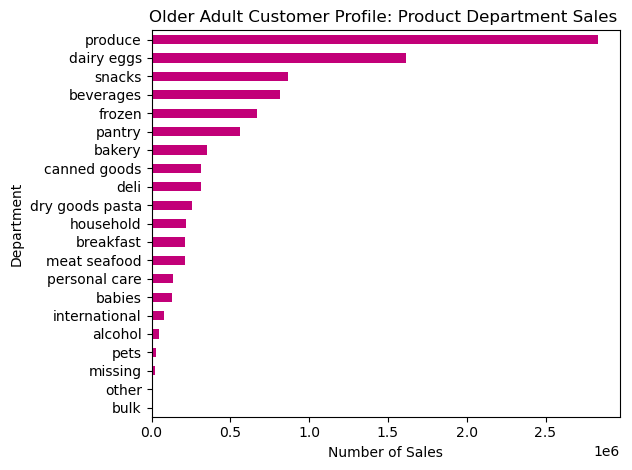

In [129]:
# Create a bar chart containing products older adults are buying
dept_older_adult=IC_subset_older_adult['department'].value_counts().sort_values(ascending=True).plot.barh(color = '#C20078')
plt.title('Older Adult Customer Profile: Product Department Sales ')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.tight_layout()

In [130]:
# Export chart
dept_older_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_older_adult_bar.png'))

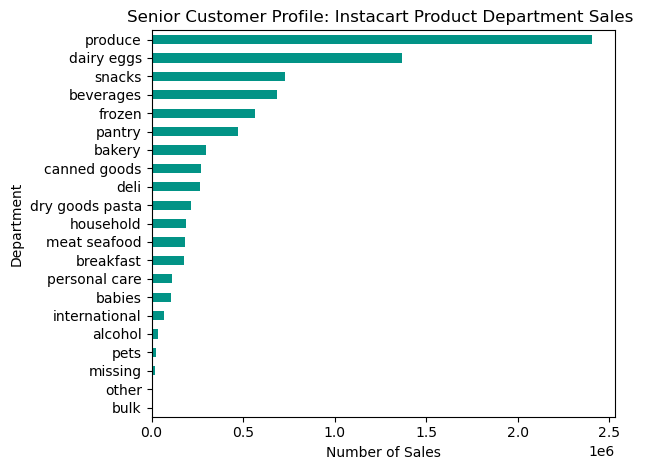

In [131]:
dept_senior_bar=IC_subset_senior['department'].value_counts().sort_values(ascending=True).plot.barh(color = '#029386')
plt.title('Senior Customer Profile: Instacart Product Department Sales ')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.tight_layout()

In [132]:
# export chart 
dept_senior_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_senior_bar.png'))

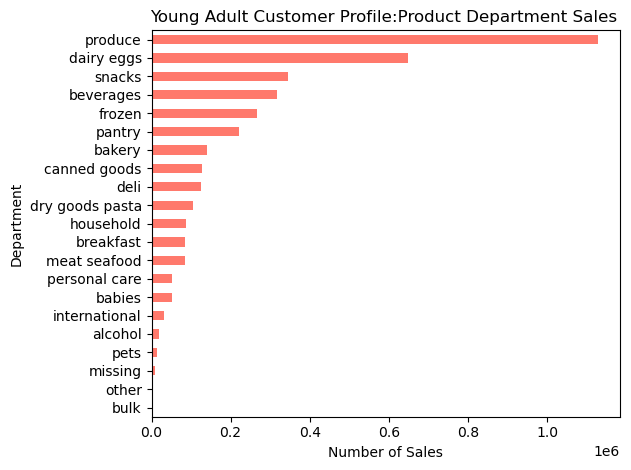

In [133]:
dept_young_adult =IC_subset_young_adult['department'].value_counts().sort_values(ascending=True).plot.barh(color = '#FF796C')
plt.title('Young Adult Customer Profile:Product Department Sales ')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.tight_layout()

In [134]:
# Export chart 
dept_young_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_young_adult_bar.png'))

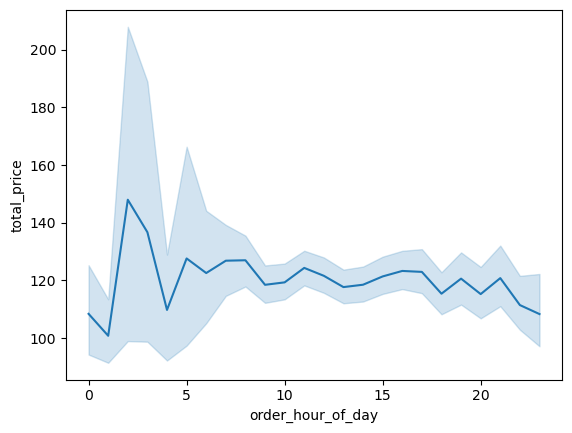

In [206]:
# Create a linechart of the order hours of day and total prices
line = sns.lineplot(data = IC_subset_group, x = 'order_hour_of_day', y = 'total_price')

In [208]:
# Export order_hours_of_day compared to prices
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

Text(0.5, 0, 'Age Group')

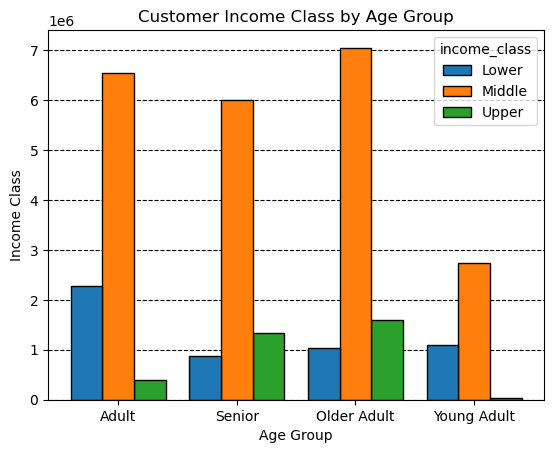

In [210]:
income_vs_age_group = sns.histplot(data= IC_subset, x='age_group', hue='income_class', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='black', linestyle='dashed')
plt.title('Customer Income Class by Age Group')
plt.ylabel('Income Class')
plt.xlabel('Age Group')

In [212]:
# Export income_vs_age_group histogram 
income_vs_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_class_vs_age_group.png'))